# (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter.

In [ ]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/assignment4"
if not os.path.exists(datadir):
  !ln -s "/content/drive/MyDrive/path_to/assignment4" $datadir # TODO: Fill your Assignment 4 path
os.chdir(datadir)
!pwd

# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [11]:
from gan.train import train
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss, w_discriminator_loss, w_generator_loss
from gan.utils import show_images

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## MNIST Dataset


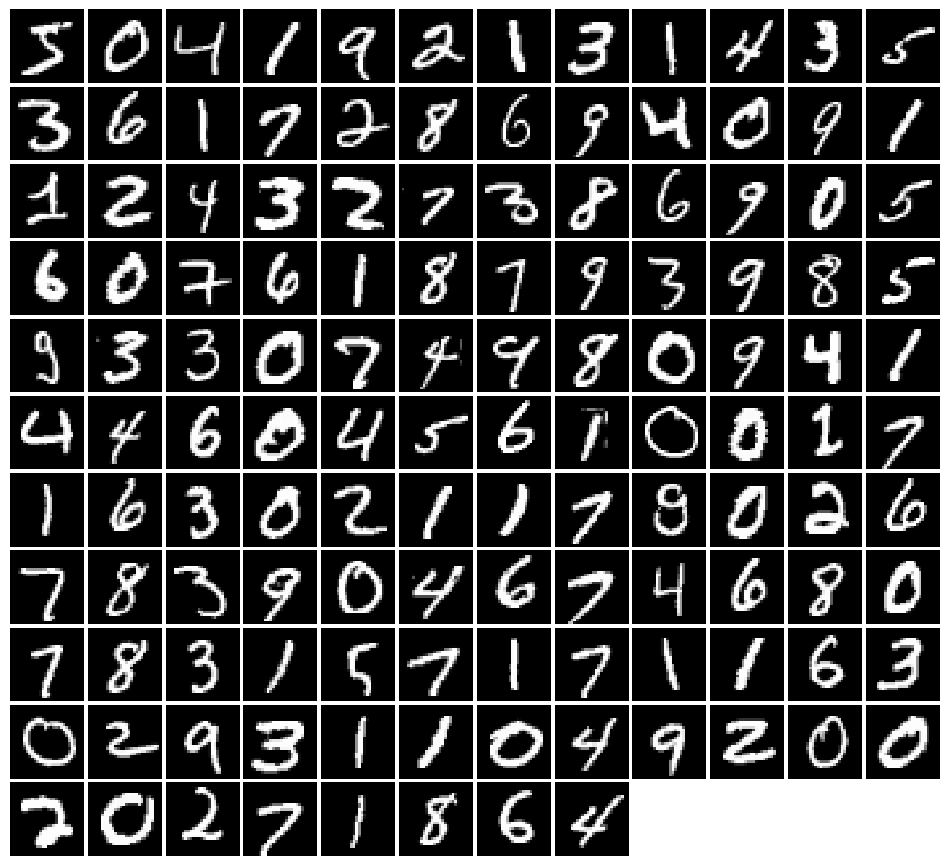

In [4]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)

try:
  imgs = next(iter(loader_train))[0].view(batch_size, 784).numpy().squeeze()
except:
  imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()

show_images(imgs)

# Discriminator and Generator


In [5]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [6]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [7]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 1.369, G:0.6671


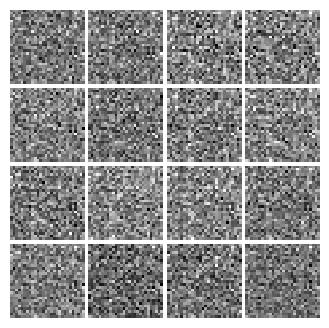


Iter: 250, D: 1.184, G:1.278


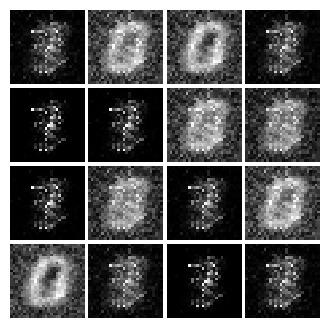


EPOCH:  2
Iter: 500, D: 1.074, G:1.417


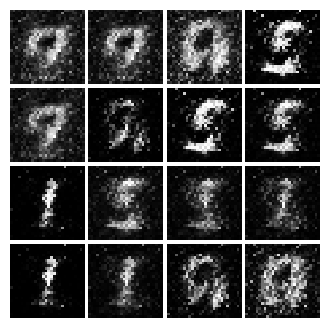


Iter: 750, D: 1.142, G:2.456


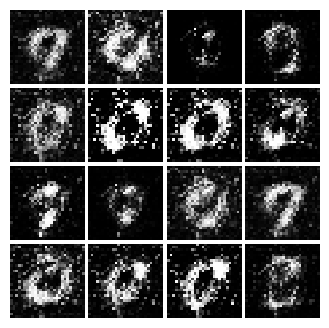


EPOCH:  3
Iter: 1000, D: 0.9121, G:1.202


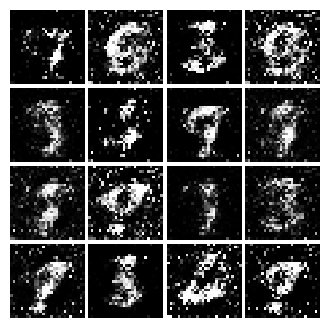


Iter: 1250, D: 1.236, G:0.3986


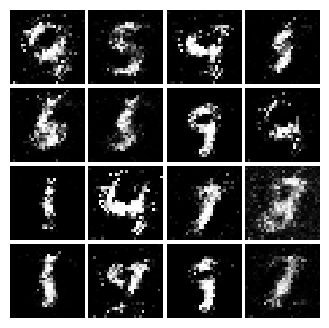


EPOCH:  4
Iter: 1500, D: 1.164, G:1.393


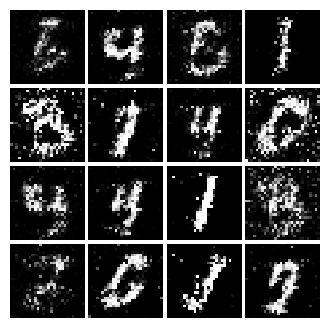


Iter: 1750, D: 1.227, G:1.149


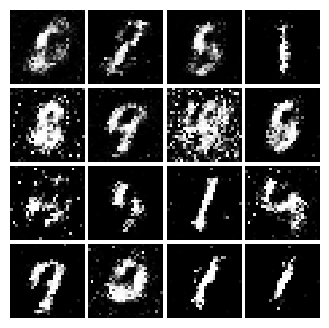


EPOCH:  5
Iter: 2000, D: 1.257, G:0.9087


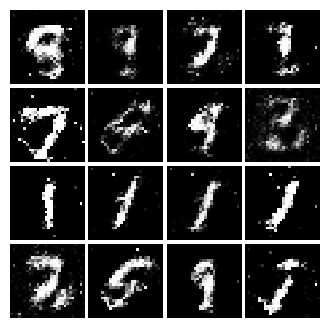


Iter: 2250, D: 1.334, G:0.9025


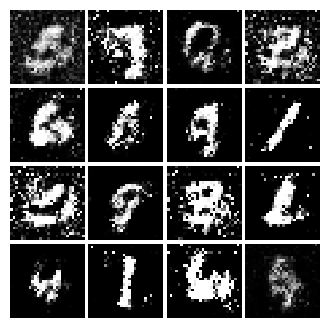


EPOCH:  6
Iter: 2500, D: 1.322, G:1.031


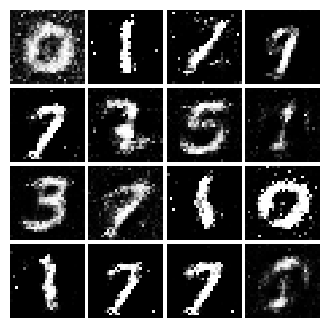


Iter: 2750, D: 1.291, G:0.8552


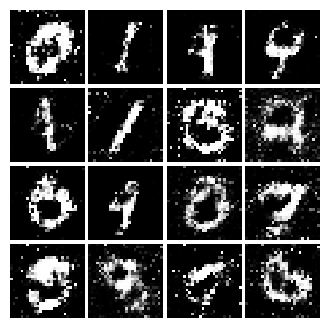


EPOCH:  7
Iter: 3000, D: 1.258, G:0.8583


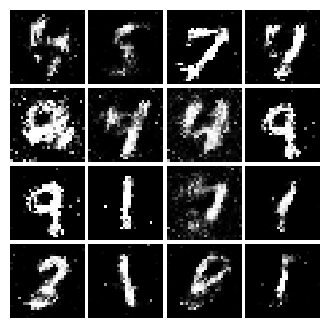


Iter: 3250, D: 1.267, G:0.8585


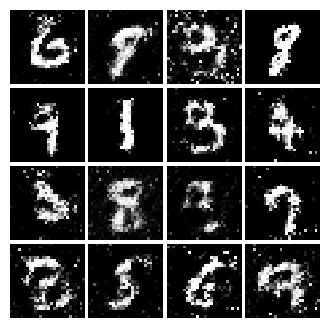


EPOCH:  8
Iter: 3500, D: 1.276, G:0.8033


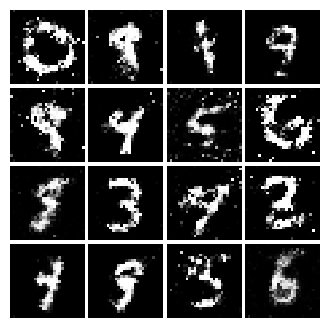


EPOCH:  9
Iter: 3750, D: 1.295, G:0.8569


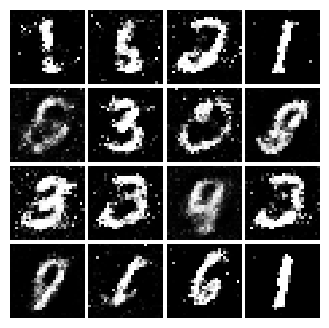


Iter: 4000, D: 1.355, G:0.7914


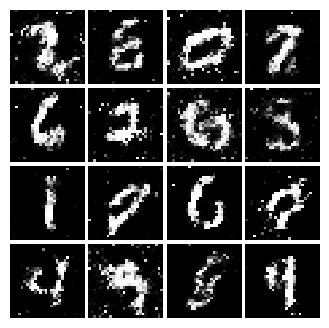


EPOCH:  10
Iter: 4250, D: 1.303, G:0.8845


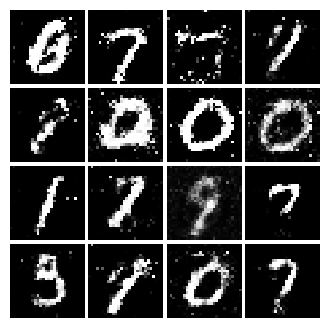


Iter: 4500, D: 1.259, G:0.8862


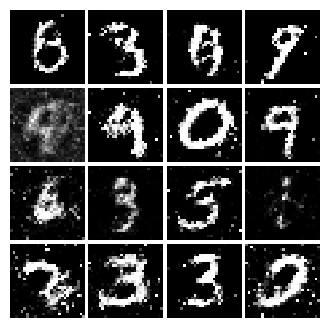

In [11]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.5719, G:0.4439


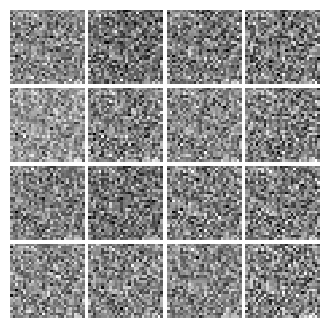


Iter: 250, D: 0.1592, G:0.6119


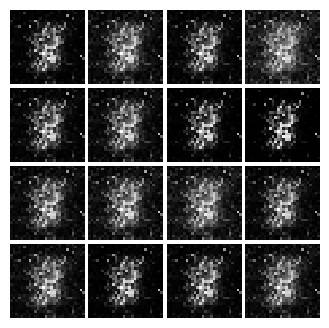


EPOCH:  2
Iter: 500, D: 0.5697, G:0.3656


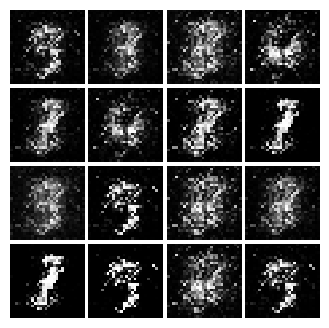


Iter: 750, D: 0.1366, G:0.3688


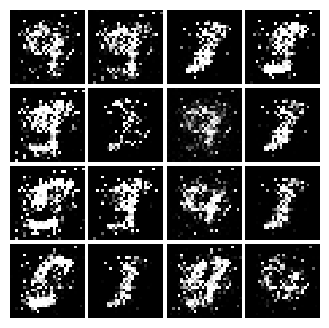


EPOCH:  3
Iter: 1000, D: 0.1127, G:0.494


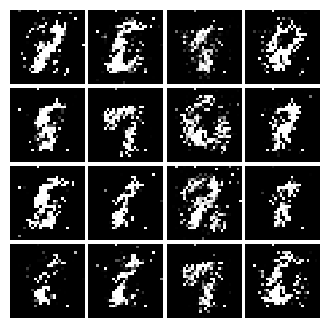


Iter: 1250, D: 0.1596, G:0.2533


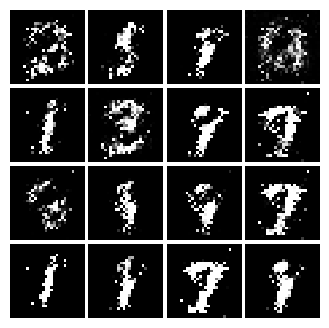


EPOCH:  4
Iter: 1500, D: 0.1406, G:0.3744


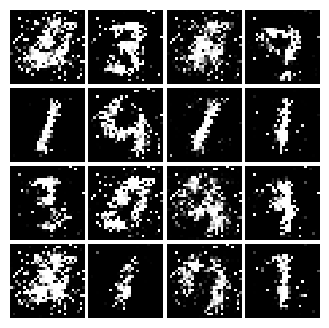


Iter: 1750, D: 0.15, G:0.208


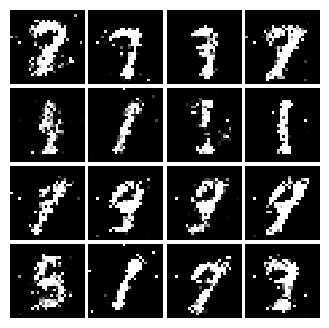


EPOCH:  5
Iter: 2000, D: 0.205, G:0.2288


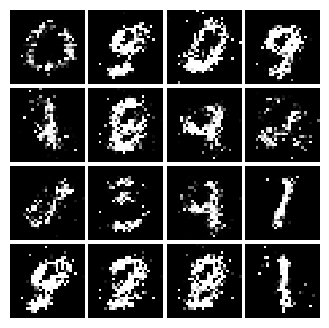


Iter: 2250, D: 0.2138, G:0.1878


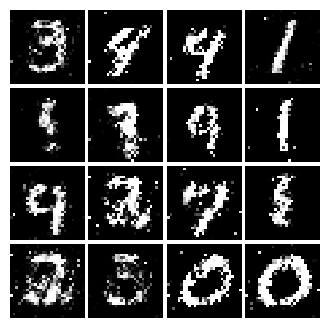


EPOCH:  6
Iter: 2500, D: 0.2302, G:0.2218


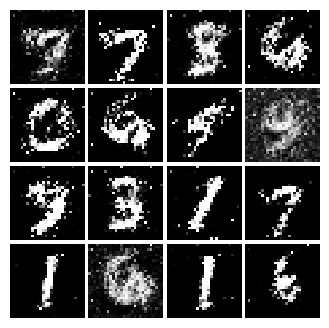


Iter: 2750, D: 0.2229, G:0.1535


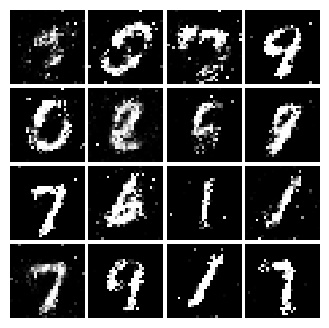


EPOCH:  7
Iter: 3000, D: 0.2263, G:0.164


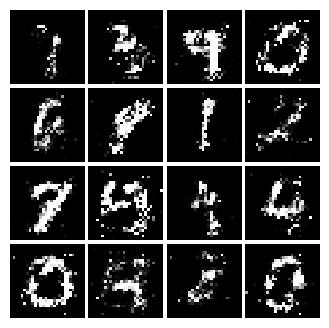


Iter: 3250, D: 0.2029, G:0.1654


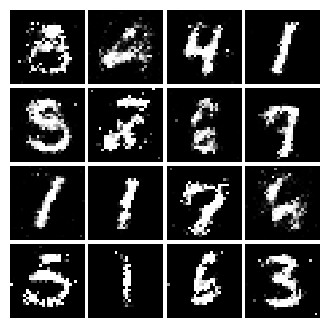


EPOCH:  8
Iter: 3500, D: 0.2123, G:0.1748


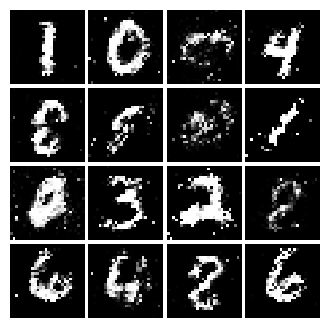


EPOCH:  9
Iter: 3750, D: 0.2118, G:0.1729


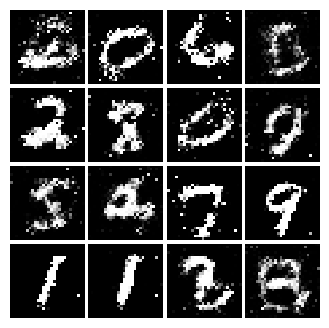


Iter: 4000, D: 0.2414, G:0.1677


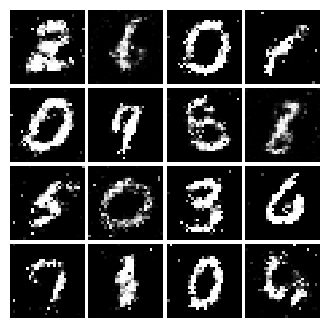


EPOCH:  10
Iter: 4250, D: 0.2203, G:0.162


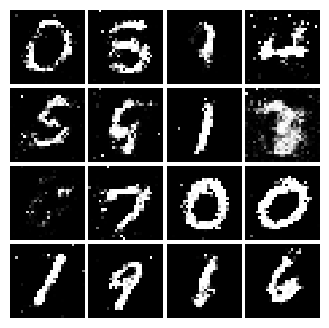


Iter: 4500, D: 0.2328, G:0.1718


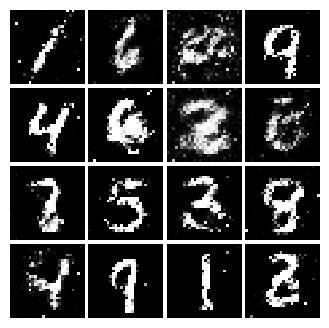

In [9]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: -0.05495, G:-0.05039


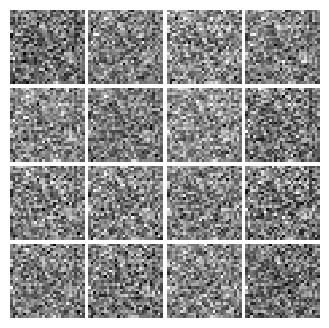


Iter: 250, D: 172.0, G:-2.604e+03


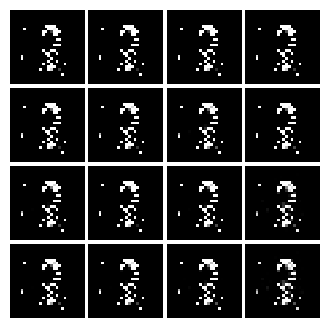


EPOCH:  2
Iter: 500, D: -408.4, G:633.8


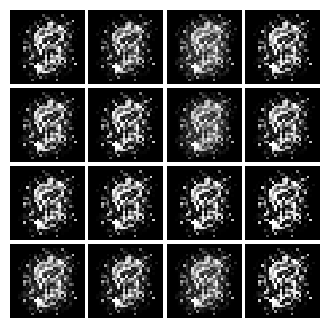


Iter: 750, D: 20.53, G:-745.3


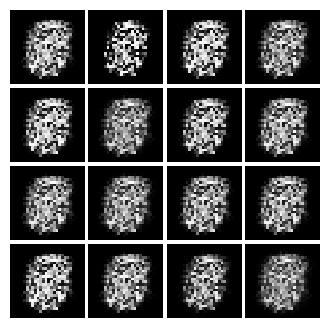


EPOCH:  3
Iter: 1000, D: 11.79, G:171.0


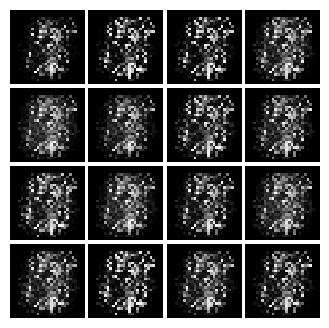


Iter: 1250, D: 63.17, G:-336.1


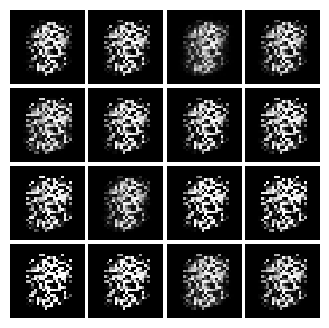


EPOCH:  4
Iter: 1500, D: -101.4, G:-552.6


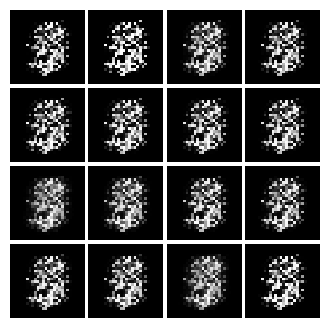


Iter: 1750, D: 120.2, G:-341.4


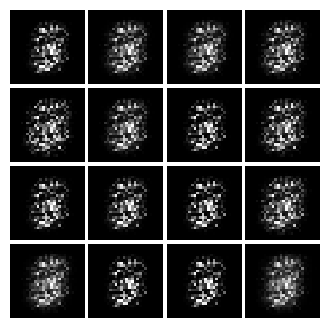


EPOCH:  5
Iter: 2000, D: 37.59, G:89.8


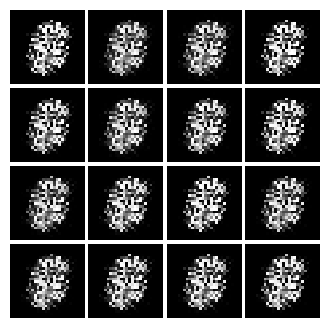


Iter: 2250, D: 15.17, G:-134.2


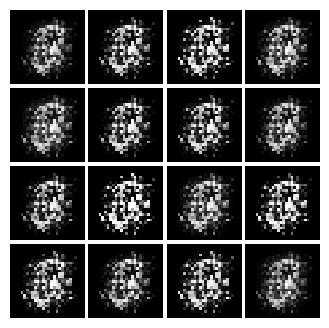


EPOCH:  6
Iter: 2500, D: 16.8, G:146.3


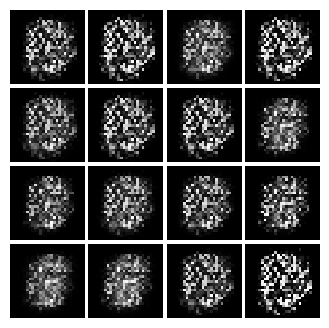


Iter: 2750, D: -3.021, G:-95.02


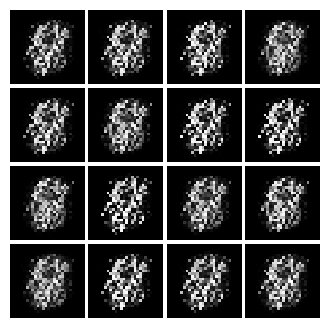


EPOCH:  7
Iter: 3000, D: 14.56, G:221.7


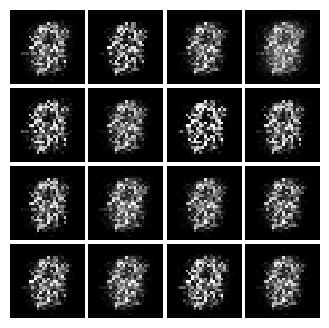


Iter: 3250, D: 9.255, G:28.65


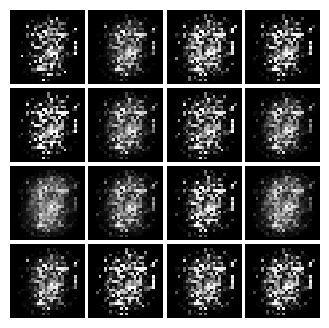


EPOCH:  8
Iter: 3500, D: -12.25, G:373.4


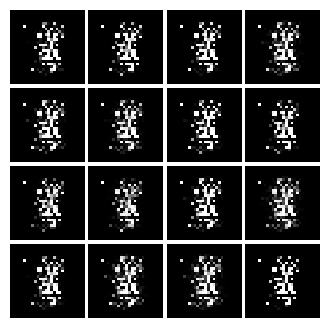


EPOCH:  9
Iter: 3750, D: -3.977e+05, G:7.437e+04


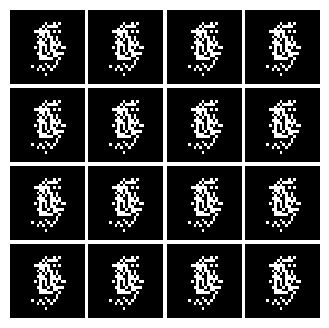


Iter: 4000, D: -2.558e+06, G:3.446e+05


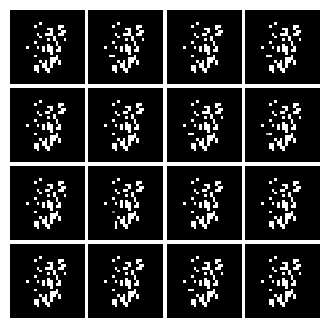


EPOCH:  10
Iter: 4250, D: -9.704e+06, G:3.178e+06


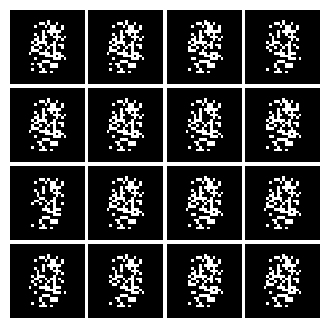


Iter: 4500, D: -3.449e+07, G:1.328e+07


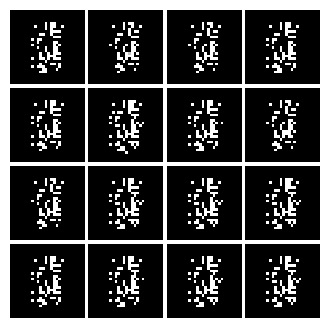

In [12]:
# WGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, w_discriminator_loss, w_generator_loss, train_loader=loader_train, num_epochs=10, device=device)